In [15]:
import os.path
from pathlib import Path
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## K-MHaS 데이터 전처리

In [3]:
hate_data_root = '/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/origin/K-MHaS-main/data'

In [8]:
data_path_list = glob(str(Path(hate_data_root) / '*.txt'))
data_path_list

['/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/origin/K-MHaS-main/data/kmhas_valid.txt',
 '/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/origin/K-MHaS-main/data/kmhas_test.txt',
 '/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/origin/K-MHaS-main/data/kmhas_train.txt']

In [40]:
for path in data_path_list:
    temp = pd.read_table(path)
    multi_label_num = temp.label.str.contains(',').sum()
    total = len(temp)
    print(f'{os.path.basename(path)}: {multi_label_num} / {total}({multi_label_num / total * 100:.1f}%)')

kmhas_valid.txt: 1014 / 8776(11.6%)
kmhas_test.txt: 2754 / 21939(12.6%)
kmhas_train.txt: 9839 / 78977(12.5%)


In [61]:
merged_df = pd.DataFrame()

for path in data_path_list:
    temp = pd.read_table(path)
    temp = temp.drop(temp[temp.label.str.contains(',')].index)
    merged_df = pd.concat([merged_df, temp])
    print(temp.label.unique())
    print(len(temp))
    print()
    
merged_df = merged_df.reset_index(drop=True)

['8' '3' '1' '7' '6' '0' '2' '4' '5']
7762

['8' '2' '0' '1' '4' '7' '3' '5' '6']
19185

['8' '2' '4' '3' '0' '5' '7' '1' '6']
69138



In [55]:
merged_df.label.unique()

array(['8', '3', '1', '7', '6', '0', '2', '4', '5'], dtype=object)

In [67]:
merged_df.to_csv('/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/mergeTrainValTest-removeMultiLabel-kmhas.csv', index=False)

In [68]:
pd.read_csv('/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/mergeTrainValTest-removeMultiLabel-kmhas.csv').head()

,document,label
0,서로만이 이렇게 있을때 보기 좋다♥,8
1,승호 키스신에 누나는 웁니다..흑흑..너무 찐하쟈너..무방비상태였는데 충격먹음..손...,8
2,전광훈이 교주 됐네 ㅋㅋㅋ 애라이 새꺄 니가 목사면 박쥐가 독수리다 임마,3
3,인덕션 꾹 누를때 기절하는줄ㅋㅋㅋ 아재개그통한다,8
4,못생긴대로 논다더니 ㅋㅋㅋㅋ,1


## UnSmile 데이터 전처리

In [127]:
unsmile_data_root = '/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/origin/korean_unsmile_dataset-main'

In [129]:
merged_df = pd.DataFrame()

for path in glob(os.path.join(unsmile_data_root, '*.tsv')):
    print(path)
    temp = pd.read_csv(path, delimiter='\t')
    merged_df = pd.concat([merged_df, temp])
    
merged_df = merged_df.reset_index(drop=True)
merged_df['label_num'] = merged_df.iloc[:, 1:].sum(axis=1)
merged_df = merged_df[merged_df['label_num'] == 1]
merged_df = merged_df.reset_index(drop=True)

/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/origin/korean_unsmile_dataset-main/unsmile_valid_v1.0.tsv
/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/origin/korean_unsmile_dataset-main/unsmile_train_v1.0.tsv


In [130]:
(merged_df.label_num > 1).sum()

0

In [131]:
merged_df.columns

Index(['문장', '여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오',
       '악플/욕설', 'clean', '개인지칭', 'label_num'],
      dtype='object')

In [132]:
for idx, row in merged_df.iterrows():
    if any((row['여성/가족'], row['남성'], row['성소수자'])):
        merged_df.loc[idx, 'label'] = 5
        continue
    
    if any((row['인종/국적'], row['지역'])):
        merged_df.loc[idx, 'label'] = 0
        continue
    
    if row['연령']:
        merged_df.loc[idx, 'label'] = 4
        continue
    
    if row['종교']:
        merged_df.loc[idx, 'label'] = 7
        continue
    
    if any((row['기타 혐오'], row['악플/욕설'])):
        merged_df.loc[idx, 'label'] = 3
        continue
    
    merged_df.loc[idx, 'label'] = 10

In [133]:
merged_df = merged_df[['문장', 'label']]

In [134]:
merged_df['label'] = merged_df.label.astype('int')

In [135]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17154 entries, 0 to 17153
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      17154 non-null  object
 1   label   17154 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 268.2+ KB


In [140]:
merged_df.head()

,문장,label
0,ㅇㄱㄹㅇ 진짜 죽어도 상관없다는 마인드로 싸웠더니 지금 서열 상타취노 식칼들고 니가...,5
1,여자들은 취미가 애낳는건가.. 취미를 좀 가져라,5
2,조팔ㅋㅋ 남한 길거리 돌아다니면 한국남자때문에 눈재기하는데 그걸 내 폰에 굳이 담아...,5
3,바지 내리다 한남들 와꾸 보고 올려뿟노,5
4,저새끼 슈스케나온새끼잖아 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,3


In [142]:
merged_df = merged_df.rename(columns={'문장': 'document'})

In [143]:
merged_df.head()

,document,label
0,ㅇㄱㄹㅇ 진짜 죽어도 상관없다는 마인드로 싸웠더니 지금 서열 상타취노 식칼들고 니가...,5
1,여자들은 취미가 애낳는건가.. 취미를 좀 가져라,5
2,조팔ㅋㅋ 남한 길거리 돌아다니면 한국남자때문에 눈재기하는데 그걸 내 폰에 굳이 담아...,5
3,바지 내리다 한남들 와꾸 보고 올려뿟노,5
4,저새끼 슈스케나온새끼잖아 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,3


In [144]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17154 entries, 0 to 17153
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  17154 non-null  object
 1   label     17154 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 268.2+ KB


In [145]:
merged_df.to_csv('/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/mergeTrainVal-removeMultiLabel-unsmile.csv', index=False)

In [217]:
df = pd.read_csv('/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/mergeTrainVal-removeMultiLabel-unsmile.csv')

In [218]:
df.head()

,document,label
0,ㅇㄱㄹㅇ 진짜 죽어도 상관없다는 마인드로 싸웠더니 지금 서열 상타취노 식칼들고 니가...,5
1,여자들은 취미가 애낳는건가.. 취미를 좀 가져라,5
2,조팔ㅋㅋ 남한 길거리 돌아다니면 한국남자때문에 눈재기하는데 그걸 내 폰에 굳이 담아...,5
3,바지 내리다 한남들 와꾸 보고 올려뿟노,5
4,저새끼 슈스케나온새끼잖아 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,3


In [219]:
df.label.unique()

array([ 5,  3,  0, 10,  7,  4])

In [220]:
df.label.value_counts()

10    4674
3     4248
5     4121
0     2517
7     1056
4      538
Name: label, dtype: int64

In [221]:
df = df[df.label < 10].reset_index(drop=True)

In [226]:
df.to_csv('/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/mergeTrainVal-removeMultiLabel-unsmile.csv', index=False)

## HateScore 데이터 전처리

In [196]:
csv_path = '/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/origin/HateScore.csv'

In [197]:
df = pd.read_csv(csv_path, index_col=0)
df.head()

,comment,macrolabel,microlabel,source
0,절라남도 벌레?,혐오발언,지역,온라인 댓글
1,부산에서 학식먹었는데 mt 동기mt 동아리mt 단한번도 해운대 안감 부산 현지인들이...,혐오발언,지역,온라인 댓글
2,쌍도 여혐끝판왕의성지,혐오발언,지역,온라인 댓글
3,제목보고 전라도 직감,혐오발언,지역,온라인 댓글
4,홍어지 병신아 ㅋㅋㅋ,혐오발언,지역,온라인 댓글


In [198]:
df = df[df['source'] == '온라인 댓글']  # 온라인 댓글 외 필터링

In [199]:
df = df[~df.microlabel.str.contains(',')]  # 다중 라벨 제외

In [200]:
df = df[~(df.microlabel == '단순 악플')]  # 단순 악플 제외

In [201]:
df.microlabel.value_counts()

None     838
지역       333
성소수자     112
여성/가족     72
연령        40
종교        34
기타 혐오     33
인종/국적     25
남성        14
Name: microlabel, dtype: int64

In [202]:
df = df.reset_index(drop=True)

In [203]:
df.index

RangeIndex(start=0, stop=1501, step=1)

In [204]:
for idx, row in df.iterrows():
    _, _, label, _ = row
    
    if label in ['여성/가족', '남성', '성소수자']:
        df.loc[idx, 'label'] = 5
    elif label in ['인종/국적', '지역']:
        df.loc[idx, 'label'] = 0
    elif label in ['연령']:
        df.loc[idx, 'label'] = 4
    elif label in ['종교']:
        df.loc[idx, 'label'] = 7
    elif label in ['기타 혐오']:
        df.loc[idx, 'label'] = 3
    else:
        df.loc[idx, 'label'] = 10
        

In [205]:
df = df[df.label < 10]

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 0 to 662
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   comment     663 non-null    object 
 1   macrolabel  663 non-null    object 
 2   microlabel  663 non-null    object 
 3   source      663 non-null    object 
 4   label       663 non-null    float64
dtypes: float64(1), object(4)
memory usage: 31.1+ KB


In [209]:
df.label.unique()

array([0., 7., 4., 5., 3.])

In [210]:
df.head()

,comment,macrolabel,microlabel,source,label
0,절라남도 벌레?,혐오발언,지역,온라인 댓글,0.0
1,부산에서 학식먹었는데 mt 동기mt 동아리mt 단한번도 해운대 안감 부산 현지인들이...,혐오발언,지역,온라인 댓글,0.0
2,쌍도 여혐끝판왕의성지,혐오발언,지역,온라인 댓글,0.0
3,제목보고 전라도 직감,혐오발언,지역,온라인 댓글,0.0
4,홍어지 병신아 ㅋㅋㅋ,혐오발언,지역,온라인 댓글,0.0


In [211]:
df['label'] = df.label.astype('int')

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 0 to 662
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comment     663 non-null    object
 1   macrolabel  663 non-null    object
 2   microlabel  663 non-null    object
 3   source      663 non-null    object
 4   label       663 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 31.1+ KB


In [213]:
df.head()

,comment,macrolabel,microlabel,source,label
0,절라남도 벌레?,혐오발언,지역,온라인 댓글,0
1,부산에서 학식먹었는데 mt 동기mt 동아리mt 단한번도 해운대 안감 부산 현지인들이...,혐오발언,지역,온라인 댓글,0
2,쌍도 여혐끝판왕의성지,혐오발언,지역,온라인 댓글,0
3,제목보고 전라도 직감,혐오발언,지역,온라인 댓글,0
4,홍어지 병신아 ㅋㅋㅋ,혐오발언,지역,온라인 댓글,0


In [216]:
df.to_csv('/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/onlyOnlineComment-removeMultiLabel-hatescore.csv', index=False)

In [231]:
df = pd.read_csv('/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/onlyOnlineComment-removeMultiLabel-hatescore.csv')

In [232]:
df.head()

,comment,macrolabel,microlabel,source,label
0,절라남도 벌레?,혐오발언,지역,온라인 댓글,0
1,부산에서 학식먹었는데 mt 동기mt 동아리mt 단한번도 해운대 안감 부산 현지인들이...,혐오발언,지역,온라인 댓글,0
2,쌍도 여혐끝판왕의성지,혐오발언,지역,온라인 댓글,0
3,제목보고 전라도 직감,혐오발언,지역,온라인 댓글,0
4,홍어지 병신아 ㅋㅋㅋ,혐오발언,지역,온라인 댓글,0


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comment     663 non-null    object
 1   macrolabel  663 non-null    object
 2   microlabel  663 non-null    object
 3   source      663 non-null    object
 4   label       663 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 26.0+ KB


In [234]:
df = df[['comment', 'label']].rename(columns={'comment': 'document'})

In [236]:
df.index

RangeIndex(start=0, stop=663, step=1)

In [237]:
df.to_csv('/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/onlyOnlineComment-removeMultiLabel-hatescore.csv', index=False)

## 병합

In [238]:
kmhas_dataset = '/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/mergeTrainValTest-removeMultiLabel-kmhas.csv'
unsmile_dataset = '/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/mergeTrainVal-removeMultiLabel-unsmile.csv'
hatescore_dataset = '/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/onlyOnlineComment-removeMultiLabel-hatescore.csv'

In [239]:
df = pd.DataFrame()

for path in [kmhas_dataset, unsmile_dataset, hatescore_dataset]:
    df = pd.concat([df, pd.read_csv(path)])

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109228 entries, 0 to 662
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  109228 non-null  object
 1   label     109228 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ MB


In [241]:
df.head()

,document,label
0,서로만이 이렇게 있을때 보기 좋다♥,8
1,승호 키스신에 누나는 웁니다..흑흑..너무 찐하쟈너..무방비상태였는데 충격먹음..손...,8
2,전광훈이 교주 됐네 ㅋㅋㅋ 애라이 새꺄 니가 목사면 박쥐가 독수리다 임마,3
3,인덕션 꾹 누를때 기절하는줄ㅋㅋㅋ 아재개그통한다,8
4,못생긴대로 논다더니 ㅋㅋㅋㅋ,1


In [244]:
df.to_csv('/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/merge-kmhas-unsmile-hatescore.csv', index=False)

## EDA

In [8]:
df = pd.read_csv('/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/merge-kmhas-unsmile-hatescore.csv')

In [9]:
df.head()

,document,label,kor-label,en-label
0,서로만이 이렇게 있을때 보기 좋다♥,8,해당사항없음,Not Hate Speech
1,승호 키스신에 누나는 웁니다..흑흑..너무 찐하쟈너..무방비상태였는데 충격먹음..손...,8,해당사항없음,Not Hate Speech
2,전광훈이 교주 됐네 ㅋㅋㅋ 애라이 새꺄 니가 목사면 박쥐가 독수리다 임마,3,혐오욕설,Profanity
3,인덕션 꾹 누를때 기절하는줄ㅋㅋㅋ 아재개그통한다,8,해당사항없음,Not Hate Speech
4,못생긴대로 논다더니 ㅋㅋㅋㅋ,1,외모차별,Physical


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109228 entries, 0 to 109227
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   document   109228 non-null  object
 1   label      109228 non-null  int64 
 2   kor-label  109228 non-null  object
 3   en-label   109228 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [104]:
label2kor = {0: '출신차별',
            1: '외모차별',
            2: '정치성향차별',
            3: '혐오욕설',
            4: '연령차별',
            5: '성/가족차별',
            6: '인종차별',
            7: '종교차별',
            8: '해당사항없음'
            }

In [105]:
label2en = {0: 'Origin',
            1: 'Physical',
            2: 'Politics',
            3: 'Profanity',
            4: 'Age',
            5: 'Gender/Family',
            6: 'Race',
            7: 'Religion',
            8: 'Not Hate Speech'
            }

In [54]:
[i for i in label2en.values()]

['Origin',
 'Physical',
 'Politics',
 'Profanity',
 'Age',
 'Gender/Family',
 'Race',
 'Religion',
 'Not Hate Speech']

In [250]:
df['kor-label'] = df.label.apply(lambda x: label2kor[x])
df['en-label'] = df.label.apply(lambda x: label2en[x])

In [251]:
df.head()

,document,label,kor-label,en-label
0,서로만이 이렇게 있을때 보기 좋다♥,8,해당사항없음,Not Hate Speech
1,승호 키스신에 누나는 웁니다..흑흑..너무 찐하쟈너..무방비상태였는데 충격먹음..손...,8,해당사항없음,Not Hate Speech
2,전광훈이 교주 됐네 ㅋㅋㅋ 애라이 새꺄 니가 목사면 박쥐가 독수리다 임마,3,혐오욕설,Profanity
3,인덕션 꾹 누를때 기절하는줄ㅋㅋㅋ 아재개그통한다,8,해당사항없음,Not Hate Speech
4,못생긴대로 논다더니 ㅋㅋㅋㅋ,1,외모차별,Physical


In [124]:
df['kor-label'].value_counts()

해당사항없음    59615
혐오욕설      13076
출신차별       8774
성/가족차별     7667
정치성향차별     6931
외모차별       5443
연령차별       4770
종교차별       2952
Name: kor-label, dtype: int64

In [268]:
not_clean_ratio = df['kor-label'].value_counts().iloc[1:].sum() / len(df) * 100
clean_ratio = df['kor-label'].value_counts().iloc[0] / len(df) * 100
print(f'인상을 찌푸리지 않는 문장의 비중: {clean_ratio:.1f}%')
print(f'인상을 찌푸리는 문장의 비중: {not_clean_ratio:.1f}%')

인상을 찌푸리지 않는 문장의 비중: 54.6%
인상을 찌푸리는 문장의 비중: 45.4%


<AxesSubplot: >

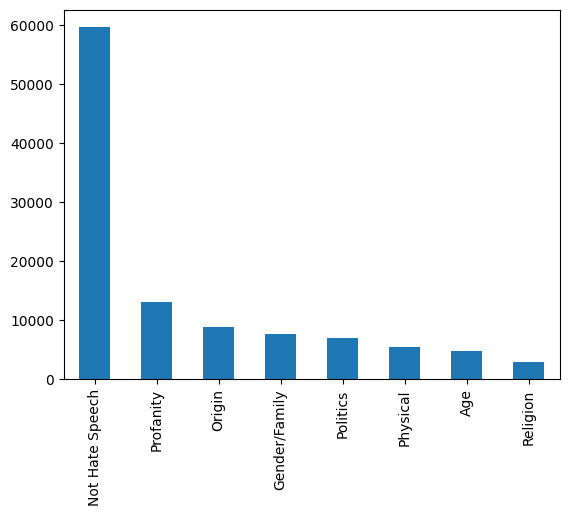

In [123]:
df['en-label'].value_counts().plot(kind='bar')

In [11]:
import torch
from transformers import AutoTokenizer

In [14]:
tokenizer = AutoTokenizer.from_pretrained('beomi/KcELECTRA-base-v2022')
tokenizer

Downloading: 100%|██████████| 504/504 [00:00<00:00, 202kB/s]
loading configuration file config.json from cache at /Users/limkaram/.cache/huggingface/hub/models--beomi--KcELECTRA-base-v2022/snapshots/4431b6c7ad00f82fd50880864574cef97e0a368b/config.json
Model config ElectraConfig {
  "_name_or_path": "beomi/KcELECTRA-base-v2022",
  "architectures": [
    "ElectraForPreTraining"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 768,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "electra",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "summary_activation": "gelu",
  "summary_last_dropout": 0.1,
  "summary_type": "first",
  "summary_use_proj": true,
  "tokenizer_class": "BertTokenizer",
  "transformers_version": 

PreTrainedTokenizerFast(name_or_path='beomi/KcELECTRA-base-v2022', vocab_size=54343, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [16]:
tokenizer.tokenize('[CLS] 개페미년 꼴보기 싫음 [SEP]')

['[CLS]', '개', '##페미', '##년', '꼴보기', '싫음', '[SEP]']

In [55]:
import re
import emoji
from soynlp.normalizer import repeat_normalize

pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-ㅣ가-힣]+')
url_pattern = re.compile(
    r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')

def clean(x): 
    x = pattern.sub(' ', x)
    x = emoji.replace_emoji(x, replace='') #emoji 삭제
    x = url_pattern.sub('', x)
    x = x.strip()
    x = repeat_normalize(x, num_repeats=2)
    return x

In [56]:
length_list = []

for text in df.document:
    text = clean(text)
    length_list.append(len(tokenizer.tokenize(f'[CLS] {text} [SEP]')))

In [57]:
np.mean(length_list)

16.920459955322812

In [58]:
pd.Series(length_list).describe()

count    109228.000000
mean         16.920460
std          13.138825
min           2.000000
25%          10.000000
50%          14.000000
75%          19.000000
max         201.000000
dtype: float64

In [59]:
total_len = len(length_list)

for x in range(40, 61):
    print(f'maxlen {x} 이하의 비중: {(np.array(length_list) <= x).sum() / total_len * 100:.1f}%')

maxlen 40 이하의 비중: 95.4%
maxlen 41 이하의 비중: 95.7%
maxlen 42 이하의 비중: 95.9%
maxlen 43 이하의 비중: 96.1%
maxlen 44 이하의 비중: 96.3%
maxlen 45 이하의 비중: 96.5%
maxlen 46 이하의 비중: 96.6%
maxlen 47 이하의 비중: 96.8%
maxlen 48 이하의 비중: 96.9%
maxlen 49 이하의 비중: 97.1%
maxlen 50 이하의 비중: 97.2%
maxlen 51 이하의 비중: 97.3%
maxlen 52 이하의 비중: 97.5%
maxlen 53 이하의 비중: 97.6%
maxlen 54 이하의 비중: 97.7%
maxlen 55 이하의 비중: 97.8%
maxlen 56 이하의 비중: 97.9%
maxlen 57 이하의 비중: 98.0%
maxlen 58 이하의 비중: 98.1%
maxlen 59 이하의 비중: 98.2%
maxlen 60 이하의 비중: 98.3%


In [60]:
max(length_list)

201

/var/folders/bv/z8y0t63535798g3s5k9w_jpr0000gn/T/ipykernel_33043/2415782539.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd.Series(length_list), bins=50)


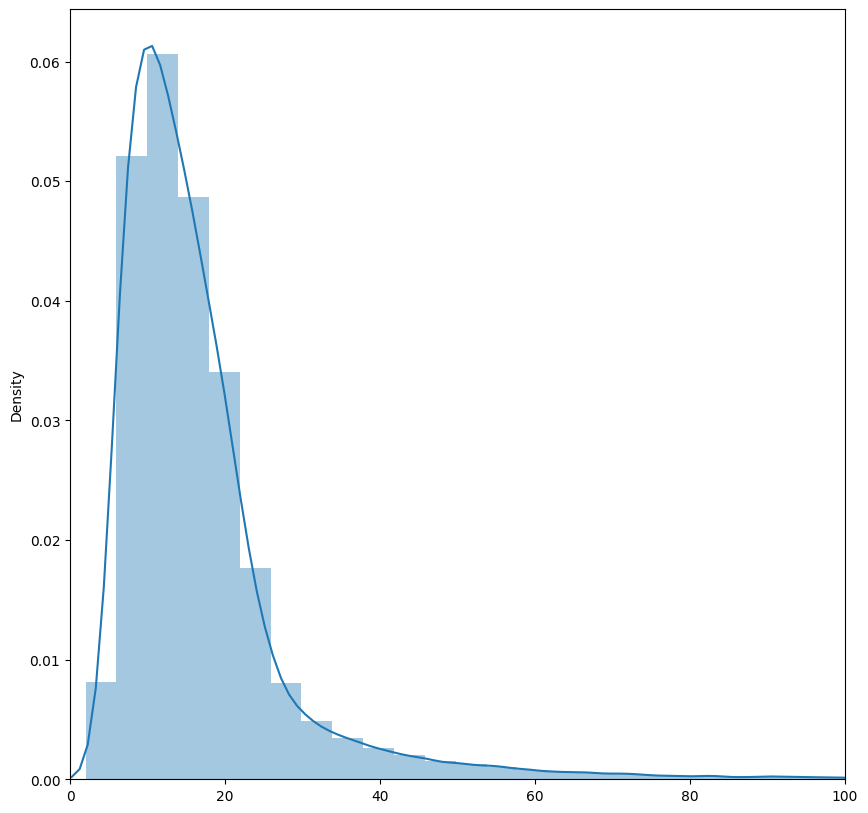

In [61]:
plt.figure(figsize=(10, 10))
sns.distplot(pd.Series(length_list), bins=50)
plt.xlim(0, 100)
plt.show()

In [92]:
df = pd.read_csv('/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/merge-kmhas-unsmile-hatescore.csv')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109228 entries, 0 to 109227
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   document   109228 non-null  object
 1   label      109228 non-null  int64 
 2   kor-label  109228 non-null  object
 3   en-label   109228 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [94]:
df.loc[df[df['label'] == 6].index, 'label'] = 0

In [95]:
df.label.value_counts()

8    59615
3    13076
0     8774
5     7667
2     6931
1     5443
4     4770
7     2952
Name: label, dtype: int64

In [96]:
def temp(x):
    x = int(x)
    
    if x > 6:
        return x - 1
    
    return x

In [97]:
df['label'] = df.label.apply(temp)

In [98]:
df.label.value_counts()

7    59615
3    13076
0     8774
5     7667
2     6931
1     5443
4     4770
6     2952
Name: label, dtype: int64

In [107]:
label2kor = {0: '출신차별',
            1: '외모차별',
            2: '정치성향차별',
            3: '혐오욕설',
            4: '연령차별',
            5: '성/가족차별',
            6: '종교차별',
            7: '해당사항없음'
            }

In [108]:
label2en = {0: 'Origin',
            1: 'Physical',
            2: 'Politics',
            3: 'Profanity',
            4: 'Age',
            5: 'Gender/Family',
            6: 'Religion',
            7: 'Not Hate Speech'
            }

In [109]:
df['kor-label'] = df.label.apply(lambda x: label2kor[x])
df['en-label'] = df.label.apply(lambda x: label2en[x])

In [110]:
df['kor-label'].value_counts()

해당사항없음    59615
혐오욕설      13076
출신차별       8774
성/가족차별     7667
정치성향차별     6931
외모차별       5443
연령차별       4770
종교차별       2952
Name: kor-label, dtype: int64

In [112]:
df.head()

,document,label,kor-label,en-label
0,서로만이 이렇게 있을때 보기 좋다♥,7,해당사항없음,Not Hate Speech
1,승호 키스신에 누나는 웁니다..흑흑..너무 찐하쟈너..무방비상태였는데 충격먹음..손...,7,해당사항없음,Not Hate Speech
2,전광훈이 교주 됐네 ㅋㅋㅋ 애라이 새꺄 니가 목사면 박쥐가 독수리다 임마,3,혐오욕설,Profanity
3,인덕션 꾹 누를때 기절하는줄ㅋㅋㅋ 아재개그통한다,7,해당사항없음,Not Hate Speech
4,못생긴대로 논다더니 ㅋㅋㅋㅋ,1,외모차별,Physical


In [113]:
df.to_csv('/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/merge-kmhas-unsmile-hatescore-removeRace.csv', index=False)

In [114]:

from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(df['document'], df['label'], test_size=0.1, random_state=1031, shuffle=True, stratify=df['label'])

In [116]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1031, shuffle=True, stratify=y_train)

In [117]:
print(len(y_train))
print(len(y_test))
print(len(y_val))

88474
10923
9831


In [118]:
train_dataset = pd.DataFrame({'document': X_train, 'label': y_train})
test_dataset = pd.DataFrame({'document': X_test, 'label': y_test})
val_dataset = pd.DataFrame({'document': X_val, 'label': y_val})


In [190]:
train_dataset.head()

,document,label
104892,호남에 기득권이 많은가 봅니다. 호남기득권과 ‘또다른 호남기득권’이 뭔가요?,0
64872,죽다살아났는데 탈중국 하고플꺼야,7
72786,저 늙은 틀탁 죽지도 않고 세번이나 시장을 서울것들 다 망했지 시원타,4
90966,참 이 사건도 마약이네 ㅋㅋㅋ 한국에서 마약 구하기 쉽네?,7
27346,얼굴 왜저래,7


In [192]:
print(f'Train dataset 개수: {len(train_dataset)}개')
print(f'Test dataset 개수: {len(test_dataset)}개')
print(f'Val dataset 개수: {len(val_dataset)}개')

Train dataset 개수: 88474개
Test dataset 개수: 10923개
Val dataset 개수: 9831개


In [120]:
train_dataset.to_csv('/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/fsc-train-v2.csv', index=False)
test_dataset.to_csv('/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/fsc-test-v2.csv', index=False)
val_dataset.to_csv('/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/fsc-val-v2.csv', index=False)

In [121]:
train_dataset[train_dataset.document.str.contains('ㅋㅋㅋㅋㅋ')]

,document,label
63598,휘인악재 ㅋㅋㅋㅋㅋㅋ 아니 휘인이 잘못한것 맞긴한데 뭘 저렇게 ㅈ같게 제목 뽑냐.,3
106867,홍어1중대 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 아놔,0
105703,오빠란 작자가 개미친새끼네 ㅋㅋㅋㅋㅋ동성애가 좆같은건 당연하지만 그렇다고 사람을 저...,5
102998,근데 쌍도애들 인터넷에선 표준어 코스프레 존나 열심히 하잖아 ㅋㅋㅋㅋㅋ,0
37630,흑기사는 함 ㅋㅋㅋㅋㅋㅋ,7
...,...,...
106939,똥꼬충이노ㅋㅋㅋㅋㅋ,5
89588,누가 믿냐 멍청이들앜ㅋㅋㅋㅋㅋㅋ니들 협박했다는 음성도 있다매?그럼 답 나온거 아냐?,7
31044,왜 쇼통령인데 못할게 뭐냐 ㅋㅋㅋㅋㅋㅋㅋㅋ 무튼 문슬람들 ㅋㅋㅋㅋㅋㅋㅋㅋㅋ,2
6866,저년은 그냥 집안이 좋은거지 연예인도아닌게 자꾸 방송인코스프레함 ㅋㅋㅋㅋㅋ,3


In [122]:
train_dataset.label.unique()

array([0, 7, 4, 6, 3, 5, 1, 2])

## 모델 추론 테스트

In [128]:
import os
import pandas as pd

import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.optim.lr_scheduler import ExponentialLR

from pytorch_lightning import LightningModule

from transformers import AutoModelForSequenceClassification, AutoTokenizer, AdamW, logging

from sklearn.metrics import accuracy_score, f1_score

import re
import emoji
from soynlp.normalizer import repeat_normalize


os.environ["TOKENIZERS_PARALLELISM"] = "false"
logging.set_verbosity_error()


class FrownSentenceClassifier(LightningModule):
    def __init__(self, **kwargs):
        super().__init__()
        self.save_hyperparameters() # 이 부분에서 self.hparams에 위 kwargs가 저장된다.
        self.clsfier = AutoModelForSequenceClassification.from_pretrained(self.hparams.pretrained_model, num_labels=self.hparams.num_labels)
        self.tokenizer = AutoTokenizer.from_pretrained(
            self.hparams.pretrained_tokenizer
            if self.hparams.pretrained_tokenizer
            else self.hparams.pretrained_model
        )

    def forward(self, **kwargs):
        return self.clsfier(**kwargs)

    def step(self, batch, batch_idx):
        data, labels = batch
        output = self(input_ids=data, labels=labels)

        # Transformers 4.0.0+
        loss = output.loss
        logits = output.logits

        preds = logits.argmax(dim=-1)

        y_true = list(labels.cpu().numpy())
        y_pred = list(preds.cpu().numpy())

        return {
            'loss': loss,
            'y_true': y_true,
            'y_pred': y_pred,
        }

    def training_step(self, batch, batch_idx):
        return self.step(batch, batch_idx)

    def validation_step(self, batch, batch_idx):
        return self.step(batch, batch_idx)
    
    def test_step(self, batch, batch_idx):
        return self.step(batch, batch_idx)

    def epoch_end(self, outputs, state='train'):
        loss = torch.tensor(0, dtype=torch.float)
        for i in outputs:
            loss += i['loss'].cpu().detach()
        loss = loss / len(outputs)

        y_true = []
        y_pred = []
        for i in outputs:
            y_true += i['y_true']
            y_pred += i['y_pred']
        
        acc = accuracy_score(y_true, y_pred)
        micro_f1 = f1_score(y_true, y_pred, average='micro')
        macro_f1 = f1_score(y_true, y_pred, average='macro')

        self.log(state+'_loss', float(loss), on_epoch=True, prog_bar=True)
        self.log(state+'_acc', acc, on_epoch=True, prog_bar=True)
        self.log(state+'_micro_f1', micro_f1, on_epoch=True, prog_bar=True)
        self.log(state+'_macro_f1', macro_f1, on_epoch=True, prog_bar=True)
        print(f'[Epoch {self.trainer.current_epoch} {state.upper()}] Loss: {loss}, Acc: {acc}, microF1: {micro_f1}, macroF1: {macro_f1}\n')
        return {'loss': loss}
    
    def training_epoch_end(self, outputs):
        self.epoch_end(outputs, state='train')

    def validation_epoch_end(self, outputs):
        self.epoch_end(outputs, state='val')
        
    def test_epoch_end(self, outputs):
        self.epoch_end(outputs, state='test')

    def configure_optimizers(self):
        if self.hparams.optimizer == 'AdamW':
            optimizer = AdamW(self.parameters(), lr=self.hparams.lr)
        elif self.hparams.optimizer == 'AdamP':
            from adamp import AdamP
            optimizer = AdamP(self.parameters(), lr=self.hparams.lr)
        else:
            raise NotImplementedError('Only AdamW and AdamP is Supported!')
        if self.hparams.lr_scheduler == 'cos':
            scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=1, T_mult=2)
        elif self.hparams.lr_scheduler == 'exp':
            scheduler = ExponentialLR(optimizer, gamma=0.5)
        else:
            raise NotImplementedError('Only cos and exp lr scheduler is Supported!')
        return {
            'optimizer': optimizer,
            'scheduler': scheduler,
        }

    def read_data(self, path):
        if path.endswith('xlsx'):
            return pd.read_excel(path)
        elif path.endswith('csv'):
            return pd.read_csv(path)
        elif path.endswith('tsv') or path.endswith('txt'):
            return pd.read_csv(path, sep='\t')
        else:
            raise NotImplementedError('Only Excel(xlsx)/Csv/Tsv(txt) are Supported')

    def clean(self, x):
        pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-ㅣ가-힣]+')
        url_pattern = re.compile(
            r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')
        x = pattern.sub(' ', x)
        x = emoji.replace_emoji(x, replace='') #emoji 삭제
        x = url_pattern.sub('', x)
        x = x.strip()
        x = repeat_normalize(x, num_repeats=2)
        return x

    def encode(self, x, **kwargs):
        return self.tokenizer.encode(
            self.clean(str(x)),
            padding='max_length',
            max_length=self.hparams.max_length,
            truncation=True,
            **kwargs,
        )

    def preprocess_dataframe(self, df):
        df['document'] = df['document'].map(self.encode)
        return df

    def dataloader(self, path, shuffle=False):
        df = self.read_data(path)
        df = self.preprocess_dataframe(df)

        dataset = TensorDataset(
            torch.tensor(df['document'].to_list(), dtype=torch.long),
            torch.tensor(df['label'].to_list(), dtype=torch.long),
        )
        return DataLoader(
            dataset,
            batch_size=self.hparams.batch_size * 1 if not self.hparams.tpu_cores else self.hparams.tpu_cores,
            shuffle=shuffle,
            num_workers=self.hparams.cpu_workers,
        )

    def train_dataloader(self):
        return self.dataloader(self.hparams.train_data_path, shuffle=True)

    def val_dataloader(self):
        return self.dataloader(self.hparams.val_data_path, shuffle=False)
    
    def test_dataloader(self):
        return self.dataloader(self.hparams.test_data_path, shuffle=False)


In [181]:
import time
import torch
import pandas as pd
import re
import emoji
from soynlp.normalizer import repeat_normalize


def clean(text):
    pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-ㅣ가-힣]+')
    url_pattern = re.compile(
        r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')
    text = pattern.sub(' ', text)
    text = emoji.replace_emoji(text, replace='') #emoji 삭제
    text = url_pattern.sub('', text)
    text = text.strip()
    text = repeat_normalize(text, num_repeats=2)
    
    return text

def infer(text):
    label2kor = {0: '출신차별',
            1: '외모차별',
            2: '정치성향차별',
            3: '혐오욕설',
            4: '연령차별',
            5: '성/가족차별',
            6: '종교차별',
            7: '해당사항없음'
            }
    
    label2en = {0: 'Origin',
            1: 'Physical',
            2: 'Politics',
            3: 'Profanity',
            4: 'Age',
            5: 'Gender/Family',
            6: 'Religion',
            7: 'Not Hate Speech'
            }
    
    global model
    text = clean(text)
    
    infer_stime = time.time()
    tokens = model.tokenizer(text, return_tensors='pt')
    # print(len(tokens['input_ids'][0]))
    logits = model(**tokens).logits
    infer_etime = time.time()
    preds = torch.softmax(logits, dim=-1).detach().cpu().numpy()
    labels = [label for label in label2kor.values()]
    df = pd.DataFrame({'Label': labels, 'Probability': preds.reshape(-1,)})
    # print(f'inference elapsed time: {infer_etime - infer_stime:.3f}s')
    
    return df
    


args = {
    'ckpt_path': '/Users/limkaram/PersonalSpace/frown-sentence-classifier/temp/epoch4-val_loss0.3918-val_micro_f10.8594-val_macro_f10.8337-val_acc0.8594.ckpt'
    # 'device': torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
    # 'device': torch.device('cpu')
}
# device = args['device']
# print(f'set device: {device}')
model = FrownSentenceClassifier.load_from_checkpoint(args['ckpt_path'])
model.freeze()
model.eval()
print(model.hparams)
print(model.tokenizer)
    

"batch_size":           128
"cpu_workers":          4
"epochs":               6
"fp16":                 True
"gpu":                  0
"lr":                   5e-06
"lr_scheduler":         exp
"max_length":           60
"num_labels":           8
"optimizer":            AdamW
"pretrained_model":     beomi/KcELECTRA-base-v2022
"pretrained_tokenizer": beomi/KcELECTRA-base-v2022
"random_seed":          1031
"test_data_path":       data/preprocess/fsc-test-v2.csv
"test_mode":            False
"tpu_cores":            0
"train_data_path":      data/preprocess/fsc-train-v2.csv
"val_data_path":        data/preprocess/fsc-val-v2.csv
PreTrainedTokenizerFast(name_or_path='beomi/KcELECTRA-base-v2022', vocab_size=54343, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})


In [167]:
text_list = []
results = []

for c in range(0, 8):
    print(text)
    text = df.loc[df['label'] == c, 'document'].sample(1).iloc[0]
    text_list.append(text)
    result_df = infer(text)
    results.append(result_df)

노인들은 아무 일자리 마다않고 젎은사람들은 종더 나은직장 고를라다 그리됀겨
input text: 생긴건 라티노인데 무슨 아시아?
inference elapsed time: 0.079s
생긴건 라티노인데 무슨 아시아?
input text: 저게 얼굴이냐 존못
inference elapsed time: 0.057s
저게 얼굴이냐 존못
input text: 민주당이 망하려고 별일을 다 벌이는군..
inference elapsed time: 0.071s
민주당이 망하려고 별일을 다 벌이는군..
input text: ㅇㅇ 기존의 제도를 무너뜨리는게 민좆당에게 나쁠건 없지
inference elapsed time: 0.074s
ㅇㅇ 기존의 제도를 무너뜨리는게 민좆당에게 나쁠건 없지
input text: 찐따한테 극찬하는 틀딱 환상의 콜라보 ㅋㅋ
inference elapsed time: 0.065s
찐따한테 극찬하는 틀딱 환상의 콜라보 ㅋㅋ
input text: 남자들은도둑이네
inference elapsed time: 0.049s
남자들은도둑이네
input text: 기독교 ㅈ같아서 지지함 ㅅㄱ
inference elapsed time: 0.063s
기독교 ㅈ같아서 지지함 ㅅㄱ
input text: 왜 항상 모든게불편하신분들은 한국 여성이 저리 피해를 당했는데아갈딱 하고 계신건지....
inference elapsed time: 0.104s


In [176]:
idx = 0
print(text_list[idx])
ret = results[idx]
ret['Label'] = ret['Label'].str.replace('차별', '')
ret

IndexError: list index out of range

In [187]:
text = '개같이생겼네.'
print(text)
result_df = infer(text)
result_df['Label'] = result_df['Label'].str.replace('차별', '')
result_df

개같이생겼네.


,Label,Probability
0,출신,0.041823
1,외모,0.627756
2,정치성향,0.015943
3,혐오욕설,0.204459
4,연령,0.030013
5,성/가족,0.035755
6,종교,0.015155
7,해당사항없음,0.029096


In [140]:
result_df['Probability'] = result_df['Probability'] * 100
result_df['Label'] = result_df['Label'].str.replace('차별', '')

In [141]:
result_df

,Label,Probability
0,출신,2.311070
1,외모,0.488449
2,정치성향,41.796913
3,혐오욕설,13.640198
4,연령,0.610023
5,성/가족,0.505398
6,종교,0.589167
7,해당사항없음,40.058784


# Multi-Label Classification 데이터 전처리

## K-MHaS 데이터 전처리

In [3]:
import os.path
from pathlib import Path
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_root_path = '/Users/limkaram/PersonalSpace/korean-frown-sentence-classifier/data/origin/K-MHaS-main/data'

In [22]:
df = pd.DataFrame()

for path in glob(os.path.join(data_root_path, '*.txt')):
    df = pd.concat([df, pd.read_table(path)])

In [14]:
# 인종차별(6) -> 출신차별(0)
def race2origin(x):
    if x == '6':
        return '0'
    
    labels = x.split(',')
    
    if '6' in labels:
        labels[labels.index('6')] = '0'
        labels = list(set(labels))
        labels = sorted(labels)
        labels = ','.join(labels)
        
        return labels
    
    return x

print(race2origin('0,1,6,8'))
print(race2origin('6'))
print(race2origin('0,1,8'))

0,1,8
0
0,1,8


In [16]:
# 종교차별(7), 해당사항없음(8) -> 종교차별(6), 해당사항없음(7)
def pull_index(x):
    if '7' in x:
        x = x.replace('7', '6')
    
    if '8' in x:
        x = x.replace('8', '7')
    
    return x
    
print(pull_index('7,8'))
print(pull_index('7'))
print(pull_index('8'))
print(pull_index('0,1,7,8'))
print(pull_index('0,1,8'))

6,7
6
7
0,1,6,7
0,1,7


In [27]:
df['label'] = df.label.apply(race2origin)
df['label'] = df['label'].apply(pull_index)

- 출신차별, Origin(0)
- 외모차별, Physical(1)
- 정치성향차별, Politics(2)
- 혐오욕설, Profanity(3)
- 연령차별, Age(4)
- 성차별, Gender(5)
- 종교차별, Religion(6)
- 해당사항없음, Not Hate Speech(7)

In [33]:
for i in range(8):
    label_num = df.label.str.contains(str(i)).sum()
    print(f'label {i}: {label_num}개')

label 0: 10495개
label 1: 8807개
label 2: 11892개
label 3: 16304개
label 4: 7370개
label 5: 8044개
label 6: 2375개
label 7: 59615개


In [34]:
df.to_csv('/Users/limkaram/PersonalSpace/korean-frown-sentence-classifier/data/origin/K-MHaS-main/data/kmhas_merge.csv', index=False)

In [35]:
df.head()

,document,label
0,서로만이 이렇게 있을때 보기 좋다♥,7
1,승호 키스신에 누나는 웁니다..흑흑..너무 찐하쟈너..무방비상태였는데 충격먹음..손...,7
2,미친돼지새끼 육갑떠네 ㅡㅡ,"1,3"
3,전광훈이 교주 됐네 ㅋㅋㅋ 애라이 새꺄 니가 목사면 박쥐가 독수리다 임마,3
4,인덕션 꾹 누를때 기절하는줄ㅋㅋㅋ 아재개그통한다,7


## UnSmile 데이터셋 전처리

In [90]:
data_root_path = '/Users/limkaram/PersonalSpace/korean-frown-sentence-classifier/data/origin/korean_unsmile_dataset-main'

In [91]:
df = pd.DataFrame()

for path in glob(os.path.join(data_root_path, '*.tsv')):
    df = pd.concat([df, pd.read_csv(path, delimiter='\t')])
    
df = df.reset_index(drop=True)

In [92]:
# 여성/가족, 남성, 성소수자 -> 성차별(5)
# 인종/국적, 지역 -> 출신차별(0)
# 연령 -> 연령차별(4)
# 종교 -> 종교차별(6)
# 기타 혐오, 악플/욕설 -> 혐오욕설(3)
# clean -> 해당사항없음(7)
# 개인지칭 -> 미사용

df = df.drop(columns='개인지칭')  # 미사용 개인지칭 제거

for idx, row in df.iterrows():
    labels = []
    
    if any((row['여성/가족'], row['남성'], row['성소수자'])):
        labels.append(5)
    
    if any((row['인종/국적'], row['지역'])):
        labels.append(0)
    
    if row['연령']:
        labels.append(4)
    
    if row['종교']:
        labels.append(6)
    
    if any((row['기타 혐오'], row['악플/욕설'])):
        labels.append(3)
    
    if row['clean']:
        labels.append(7)
        
    labels = sorted(labels)
    labels = list(map(str, labels))
    labels = ','.join(labels)
    
    df.loc[idx, 'label'] = labels

In [93]:
df = df.drop(df[df.label == ''].index)  # 아무 라벨도 안들어가있는 행 제거

In [94]:
df.head()

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,label
0,ㅇㄱㄹㅇ 진짜 죽어도 상관없다는 마인드로 싸웠더니 지금 서열 상타취노 식칼들고 니가...,0,1,0,0,0,0,0,0,0,0,5
1,여자들은 취미가 애낳는건가.. 취미를 좀 가져라,1,0,0,0,0,0,0,0,0,0,5
2,개슬람녀 다 필요없고 니 엄마만 있으면 된다,0,0,0,1,0,0,1,0,0,0,"0,6"
3,조팔ㅋㅋ 남한 길거리 돌아다니면 한국남자때문에 눈재기하는데 그걸 내 폰에 굳이 담아...,0,1,0,0,0,0,0,0,0,0,5
4,바지 내리다 한남들 와꾸 보고 올려뿟노,0,1,0,0,0,0,0,0,0,0,5


In [96]:
df = df[['문장', 'label']].rename(columns={'문장': 'document'})

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18740 entries, 0 to 18741
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  18740 non-null  object
 1   label     18740 non-null  object
dtypes: object(2)
memory usage: 439.2+ KB


In [98]:
df.to_csv('/Users/limkaram/PersonalSpace/korean-frown-sentence-classifier/data/origin/korean_unsmile_dataset-main/unsmile_merge.csv', index=False)

## HateScore 데이터셋 전처리

In [120]:
df = pd.read_csv('/Users/limkaram/PersonalSpace/korean-frown-sentence-classifier/data/origin/HateScore.csv', index_col=0)

In [121]:
df.head()

,comment,macrolabel,microlabel,source
0,절라남도 벌레?,혐오발언,지역,온라인 댓글
1,부산에서 학식먹었는데 mt 동기mt 동아리mt 단한번도 해운대 안감 부산 현지인들이...,혐오발언,지역,온라인 댓글
2,쌍도 여혐끝판왕의성지,혐오발언,지역,온라인 댓글
3,제목보고 전라도 직감,혐오발언,지역,온라인 댓글
4,홍어지 병신아 ㅋㅋㅋ,혐오발언,지역,온라인 댓글


In [122]:
df = df[df.source == '온라인 댓글']
df = df[df.macrolabel == '혐오발언']

In [123]:
# 여성/가족, 남성, 성소수자 -> 성차별(5)
# 인종/국적, 지역 -> 출신차별(0)
# 연령 -> 연령차별(4)
# 종교 -> 종교차별(6)
# 기타 혐오, 악플/욕설 -> 혐오욕설(3)

df = df.reset_index(drop=True)

for idx, row in df.iterrows():
    labels = []
    label = row['microlabel']
    
    if ('여성/가족' in label) or ('남성' in label) or ('성소수자' in label):
        labels.append(5)
        
    if ('인종/국적' in label) or ('지역' in label):
        labels.append(0)
    
    if '연령' in label:
        labels.append(4)
    
    if '종교' in label:
        labels.append(6)
        
    if ('기타 혐오' in label) or ('악플/욕설' in label):
        labels.append(3)
        
    labels = sorted(labels)
    labels = list(map(str, labels))
    labels = ','.join(labels)
    
    df.loc[idx, 'label'] = labels

In [124]:
df.label.unique()

array(['0', '0,6', '6', '0,4', '0,4,6', '4', '0,5', '5,6', '0,4,5', '4,5',
       '5', '0,3', '3,4', '3,5', '3'], dtype=object)

In [126]:
df = df[['comment', 'label']].rename(columns={'comment': 'document'})

In [127]:
df.head()

,document,label
0,절라남도 벌레?,0
1,부산에서 학식먹었는데 mt 동기mt 동아리mt 단한번도 해운대 안감 부산 현지인들이...,0
2,쌍도 여혐끝판왕의성지,0
3,제목보고 전라도 직감,0
4,홍어지 병신아 ㅋㅋㅋ,0


In [129]:
df.to_csv('/Users/limkaram/PersonalSpace/korean-frown-sentence-classifier/data/origin/hatescore_merge.csv', index=False)

['온라인 댓글']

## kmhas + unsmile + hatescore 병합

In [137]:
data_path_list = ['/Users/limkaram/PersonalSpace/korean-frown-sentence-classifier/data/origin/K-MHaS-main/data/kmhas_merge.csv',
                  '/Users/limkaram/PersonalSpace/korean-frown-sentence-classifier/data/origin/korean_unsmile_dataset-main/unsmile_merge.csv',
                  '/Users/limkaram/PersonalSpace/korean-frown-sentence-classifier/data/origin/hatescore_merge.csv']

In [138]:
df = pd.DataFrame()

for path in data_path_list:
    df = pd.concat([df, pd.read_csv(path)])
    
df = df.reset_index(drop=True)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129214 entries, 0 to 129213
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  129214 non-null  object
 1   label     129214 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [140]:
df.sample(10)

,document,label
13599,지들 아는애나왔다고 우가우가 찐따새끼들 신났네ㅋㅋㅋㅋㅣㅣ,3
114336,태극기 할배들 차 없다. 면허증도 없다. 기름값 톨비도 없다. 막걸리값 오만원씩 받...,4
55401,신천지보다 더 악질이 대깨문이다. 암적 존재다.,"2,6"
6544,예수가 그렇게 가르치던?,7
102300,댓글다왜이래요ㅠㅠ,7
65269,정부가 뭘 덮으려는건지 얘네랑 이전부터 원래 사귀던 이정재랑 그냥 막 던지네..,7
56871,혜민스님 좋아요!!! 자주 방송에 나와주세요,7
100402,일부러찌우긴...할일없어 막쳐먹다살찌니까 쪽팔려서 헛소리하네,"1,3"
63406,내가 쓴 글로 사진관 ㅈ된거는 표현의 자유! 니네 악플은 고소감! 재밌다ㅎㅎ,7
50978,홍어들난리낫네 ㅋ,0


In [148]:
df = df.drop_duplicates().reset_index(drop=True)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128369 entries, 0 to 128368
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  128369 non-null  object
 1   label     128369 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [157]:
df.to_csv('/Users/limkaram/PersonalSpace/korean-frown-sentence-classifier/data/multi-label-classification-datasets.csv', index=False)

## Multi-label 데이터셋 train, test, val 분할

In [16]:
from sklearn.model_selection import train_test_split

In [38]:
df = pd.read_csv('/Users/limkaram/PersonalSpace/korean-frown-sentence-classifier/data/multi-label-classification-datasets.csv')

In [39]:
train_dataset = df[df.label.str.contains(',')]
df = df.drop(train_dataset.index)

In [25]:
df.label.value_counts()

7    64205
3    12998
0     8962
5     7804
2     6869
1     5362
4     4695
6     2971
Name: label, dtype: int64

In [42]:
X_train, X_val, y_train, y_val = train_test_split(df['document'], df['label'], test_size=0.1, random_state=1031, shuffle=True, stratify=df['label'])
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=1031, shuffle=True, stratify=y_train)

In [43]:
train_dataset.head()

,document,label
2,미친돼지새끼 육갑떠네 ㅡㅡ,"1,3"
10,토착짱깨새기들 좀 꺼져라ㅋㅋ,"0,3"
31,얼마나 운동을 멀리하고 살이 뒤룩뒤룩 쪘으면 거길 앉고싶냐 게으른 숫퇘지들 ㅋㅋㅋ,"1,5"
53,한국남자들이 그렇지뭐 ㅉ 존재악,"0,5"
58,병ㅅ~ 면상도 디럽게 생겼꾼~,"1,3"


In [47]:
train_dataset = pd.concat([train_dataset, pd.DataFrame({'document': X_train, 'label': y_train})])

In [48]:
test_dataset = pd.DataFrame({'document': X_test, 'label': y_test})
val_dataset = pd.DataFrame({'document': X_val, 'label': y_val})

In [33]:
print(len(train_dataset))
print(len(test_dataset))
print(len(val_dataset))

106734
10248
11387


In [55]:
print(train_dataset.shape)
print(test_dataset.shape)
print(val_dataset.shape)

(106734, 2)
(10248, 2)
(11387, 2)


In [58]:
'1'.split(',')

['1']

In [66]:
test_arr = np.zeros((8, ))
test_arr[[0, 1]] = 1

In [67]:
test_arr

array([1., 1., 0., 0., 0., 0., 0., 0.])

In [115]:
def one_hot_encode(x):
    x = str(x)
    
    label_vector = np.zeros((8, ))
    labels = list(map(int, x.split(',')))
    label_vector[labels] = 1
    
    return label_vector

print(one_hot_encode('1,3'))
print(one_hot_encode('1,5'))
print(one_hot_encode('1,6,7'))
    

[0. 1. 0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0. 1. 1.]


In [79]:
id2label = {0: 'Origin',
            1: 'Physical',
            2: 'Politics',
            3: 'Profanity',
            4: 'Age',
            5: 'Gender/Family',
            6: 'Religion',
            7: 'Not Hate Speech'
            }

In [106]:
label_names = list(id2label.values())
label_names

['Origin',
 'Physical',
 'Politics',
 'Profanity',
 'Age',
 'Gender/Family',
 'Religion',
 'Not Hate Speech']

In [113]:
train_dataset = pd.read_csv('/Users/limkaram/PersonalSpace/korean-frown-sentence-classifier/data/preprocess/kfsc-multi-label-classification-train.csv')

for idx, row in train_dataset.iterrows():
    one_hot_label = one_hot_encode(row['label'])
    train_dataset.loc[idx, label_names] = one_hot_label

In [116]:
val_dataset = pd.read_csv('/Users/limkaram/PersonalSpace/korean-frown-sentence-classifier/data/preprocess/kfsc-multi-label-classification-val.csv')

for idx, row in val_dataset.iterrows():
    one_hot_label = one_hot_encode(row['label'])
    val_dataset.loc[idx, label_names] = one_hot_label

In [117]:
test_dataset = pd.read_csv('/Users/limkaram/PersonalSpace/korean-frown-sentence-classifier/data/preprocess/kfsc-multi-label-classification-test.csv')

for idx, row in test_dataset.iterrows():
    one_hot_label = one_hot_encode(row['label'])
    test_dataset.loc[idx, label_names] = one_hot_label
    

In [118]:
val_dataset.sample(10)

,document,label,Origin,Physical,Politics,Profanity,Age,Gender/Family,Religion,Not Hate Speech
4636,문재인 앞잡이 노릇하던 사람들 아닌가?,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
666,한마다로 대한민국내 문제인 이자석은 경제두ㅡ사상도국민의 정서도 문제인이다,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2587,에휴 얼굴 알려진 연예인이라고 처벌 봐라,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2228,서민정 부부 너무 재밌는데 왜 종영해요,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3705,돈주고 알바 많이 풀었네 돈밖에 없는 여자가 갑질하고 싶겠지 먹고살만하면 이제 고만...,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3193,난 골뱅이 될 정도로 술 먹은 여성이 더 문제라 생각하는데 ㅋ솔직히 남자입장에서 보...,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3237,노르웨이 시민권 안주면 쫌...,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2404,생긴건 예쁘게 생겼네,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10006,쓸데없는 연예인걱정요즘은 방송중에 히트할줄알고 기본 몇억짜리 cf찍더라ㅉㅉ 서민들아...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4954,남자에겐 여러가지 의무가 부여되지만.. 여자들은 짊어지는 의무란게 없다.. 이게 나라냐!,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [96]:
train_dataset.head()

,document,label
2,미친돼지새끼 육갑떠네 ㅡㅡ,"1,3"
10,토착짱깨새기들 좀 꺼져라ㅋㅋ,"0,3"
31,얼마나 운동을 멀리하고 살이 뒤룩뒤룩 쪘으면 거길 앉고싶냐 게으른 숫퇘지들 ㅋㅋㅋ,"1,5"
53,한국남자들이 그렇지뭐 ㅉ 존재악,"0,5"
58,병ㅅ~ 면상도 디럽게 생겼꾼~,"1,3"


array([0., 0., 0., 0., 0., 0., 0., 1.])

In [119]:
train_dataset.to_csv('/Users/limkaram/PersonalSpace/korean-frown-sentence-classifier/data/preprocess/kfsc-multi-label-classification-train.csv', index=False)
val_dataset.to_csv('/Users/limkaram/PersonalSpace/korean-frown-sentence-classifier/data/preprocess/kfsc-multi-label-classification-val.csv', index=False)
test_dataset.to_csv('/Users/limkaram/PersonalSpace/korean-frown-sentence-classifier/data/preprocess/kfsc-multi-label-classification-test.csv', index=False)

In [ ]:

train_dataset = pd.DataFrame({'document': X_train, 'label': y_train})
test_dataset = pd.DataFrame({'document': X_test, 'label': y_test})
val_dataset = pd.DataFrame({'document': X_val, 'label': y_val})

train_dataset.head()
print(f'Train dataset 개수: {len(train_dataset)}개')
print(f'Test dataset 개수: {len(test_dataset)}개')
print(f'Val dataset 개수: {len(val_dataset)}개')
train_dataset.to_csv('/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/fsc-train-v2.csv', index=False)
test_dataset.to_csv('/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/fsc-test-v2.csv', index=False)
val_dataset.to_csv('/Users/limkaram/PersonalSpace/frown-sentence-classifier/data/preprocess/fsc-val-v2.csv', index=False)

In [120]:
print(train_dataset.shape)

(106734, 10)


In [121]:
print(val_dataset.shape)

(11387, 10)


In [122]:
print(test_dataset.shape)

(10248, 10)


In [4]:
import time
import torch
import pandas as pd
import re
import emoji
from soynlp.normalizer import repeat_normalize


def clean(text):
    pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-ㅣ가-힣]+')
    url_pattern = re.compile(
        r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')
    text = pattern.sub(' ', text)
    text = emoji.replace_emoji(text, replace='') #emoji 삭제
    text = url_pattern.sub('', text)
    text = text.strip()
    text = repeat_normalize(text, num_repeats=2)
    
    return text

In [5]:
from datasets import load_dataset

dataset = load_dataset(
    "csv",
    data_files={
        "train": "/Users/limkaram/PersonalSpace/korean-frown-sentence-classifier/data/preprocess/kfsc-multi-label-classification-train.csv",
        "val": "/Users/limkaram/PersonalSpace/korean-frown-sentence-classifier/data/preprocess/kfsc-multi-label-classification-val.csv",
        "test": "/Users/limkaram/PersonalSpace/korean-frown-sentence-classifier/data/preprocess/kfsc-multi-label-classification-test.csv",
    },
)

Using custom data configuration default-38182ec6604eb93b
Found cached dataset csv (/Users/limkaram/.cache/huggingface/datasets/csv/default-38182ec6604eb93b/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['document', 'label', 'Origin', 'Physical', 'Politics', 'Profanity', 'Age', 'Gender/Family', 'Religion', 'Not Hate Speech'],
        num_rows: 106734
    })
    val: Dataset({
        features: ['document', 'label', 'Origin', 'Physical', 'Politics', 'Profanity', 'Age', 'Gender/Family', 'Religion', 'Not Hate Speech'],
        num_rows: 11387
    })
    test: Dataset({
        features: ['document', 'label', 'Origin', 'Physical', 'Politics', 'Profanity', 'Age', 'Gender/Family', 'Religion', 'Not Hate Speech'],
        num_rows: 10248
    })
})

In [7]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

In [8]:
id2label = {0: 'Origin',
            1: 'Physical',
            2: 'Politics',
            3: 'Profanity',
            4: 'Age',
            5: 'Gender/Family',
            6: 'Religion',
            7: 'Not Hate Speech'
            }
label2id = {v: k for k, v in id2label.items()}
labels = list(label2id.keys())

In [34]:
tokenizer = AutoTokenizer.from_pretrained('beomi/KcELECTRA-base-v2022')

def preprocess_data(examples):
  # take a batch of texts
  sentences = [clean(sentence) for sentence in examples['document']]
  # encode them
  encoding = tokenizer(sentences, padding="max_length", truncation=True, max_length=512)
  # add labels
  labels_batch = {k: examples[k] for k in examples.keys() if k in labels}
  # create numpy array of shape (batch_size, num_labels)
  labels_matrix = np.zeros((len(sentences), len(labels)))
  # fill numpy array
  for idx, label in enumerate(labels):
    labels_matrix[:, idx] = labels_batch[label]

  encoding["labels"] = labels_matrix.tolist()
  
  return encoding

In [36]:
encoded_dataset = dataset.map(preprocess_data, batched=True, remove_columns=dataset['train'].column_names)

  0%|          | 0/107 [00:00<?, ?ba/s]

  0%|          | 0/12 [00:00<?, ?ba/s]

  0%|          | 0/11 [00:00<?, ?ba/s]

In [37]:
encoded_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 106734
    })
    val: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 11387
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 10248
    })
})

In [38]:
encoded_dataset.set_format("torch")

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", 
                                                           problem_type="multi_label_classification", 
                                                           num_labels=len(labels),
                                                           id2label=id2label,
                                                           label2id=label2id)